# Libraries

In [24]:
%load_ext autoreload
%autoreload 2

import numpy as np
from omegaconf import OmegaConf
import models
import loss_func
import train
import loader
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch.nn as nn
import optimizer_Factory as of

import Data.genData as genData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

<Figure size 640x480 with 0 Axes>

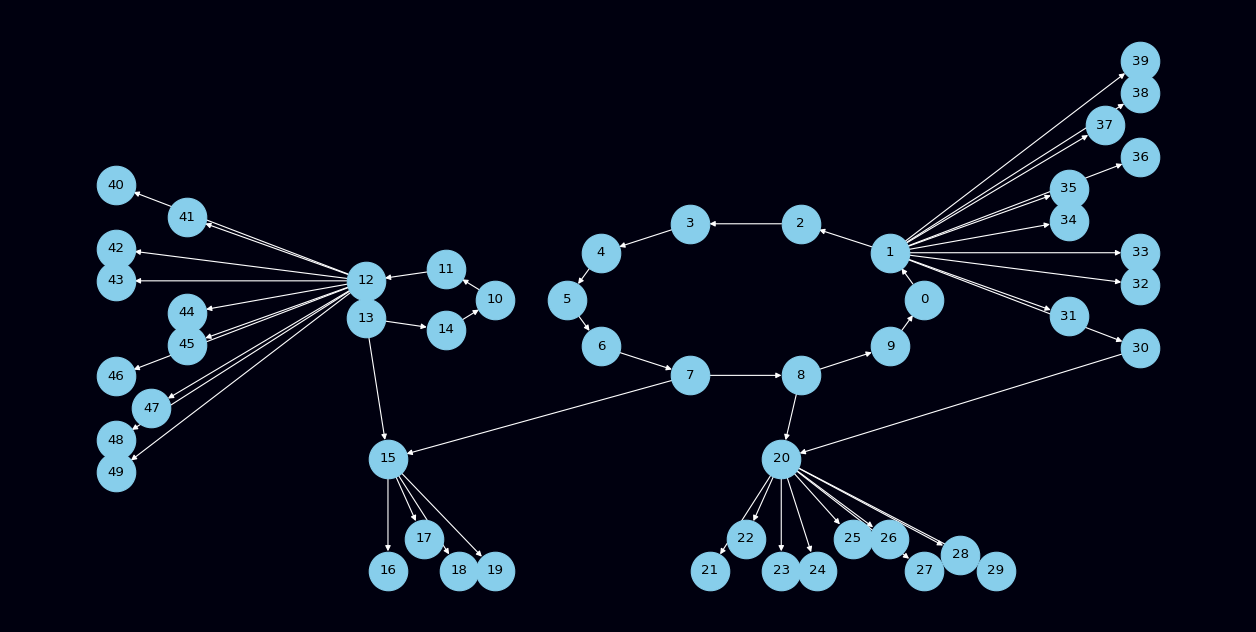

<Figure size 640x480 with 0 Axes>

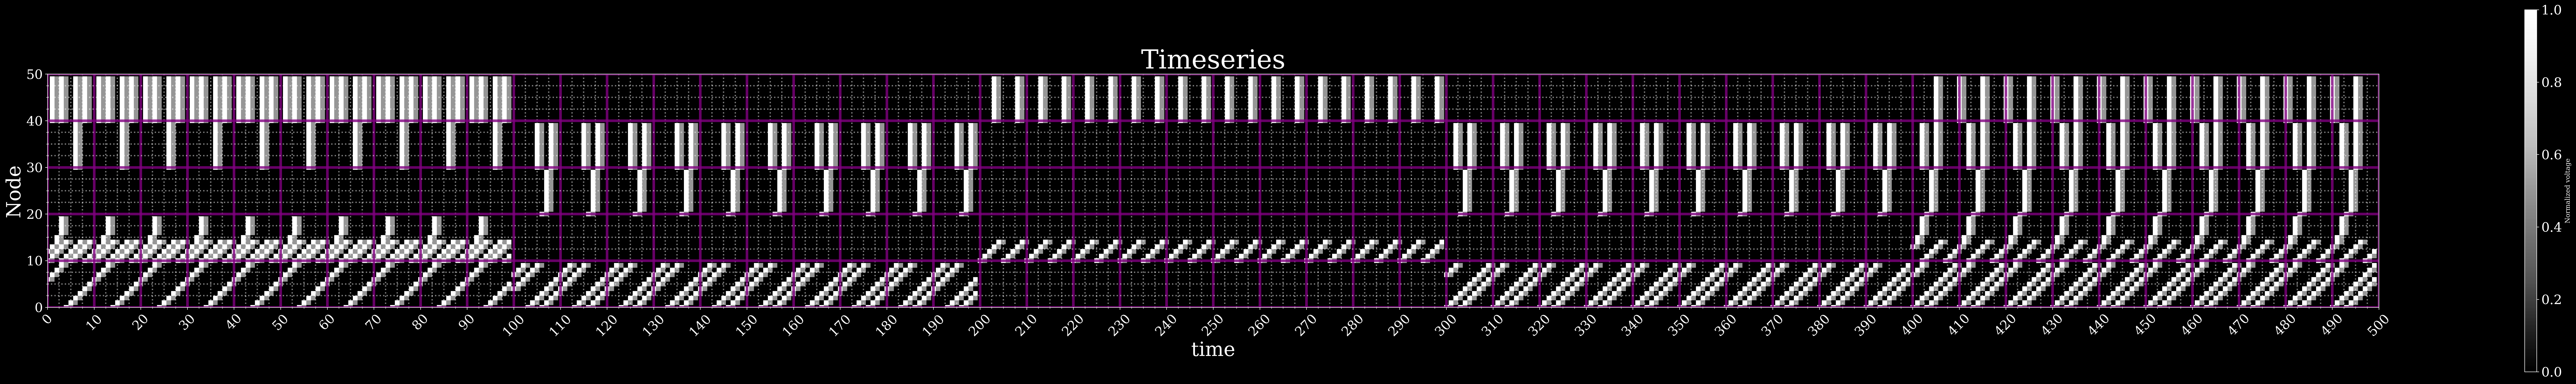

In [25]:
timeseries, adj_GT, pos  = genData.genData()

In [5]:
cfg = OmegaConf.load("config.yaml")
print(OmegaConf.to_yaml(cfg))
cmd_cfg = OmegaConf.from_cli()
cfg = OmegaConf.merge(cfg, cmd_cfg)


seed: 42
optimize:
  optimizer: Adam
  lr: 0.001
train:
  epochs: 100
  batch_size: 32
dataset:
  path: MNIST
  test_size: 0.2
  train_size: 0.6
  val_size: 0.2
  num_workers: 2
loss: MSE



In [6]:
timeseries_rand= np.random.rand(10, 1000)
print(timeseries_rand.shape)
#print(timeseries.shape)



(10, 1000)


In [20]:
window = 4
train_loader, val_loader, test_loader = loader.generateLoaders(timeseries, 'cross_correlation', window = window, overlap = 0.5)

X_train shape:  (50, 300)
X_val shape:  (50, 100)
X_test shape:  (50, 100)


Using device: cuda
epoch: 10 	 training loss: 0.1959707796573639 	 validation loss: 0.17875072360038757 	 accuracy : 1.0
epoch: 20 	 training loss: 0.18524799942970277 	 validation loss: 0.17025001347064972 	 accuracy : 1.0
epoch: 30 	 training loss: 0.17661699056625366 	 validation loss: 0.16288042813539505 	 accuracy : 1.0
epoch: 40 	 training loss: 0.1659488081932068 	 validation loss: 0.1564355120062828 	 accuracy : 1.0
epoch: 50 	 training loss: 0.15576623380184174 	 validation loss: 0.15051303803920746 	 accuracy : 1.0
epoch: 60 	 training loss: 0.1494942307472229 	 validation loss: 0.145278662443161 	 accuracy : 1.0
epoch: 70 	 training loss: 0.14454859793186187 	 validation loss: 0.14065313339233398 	 accuracy : 1.0
epoch: 80 	 training loss: 0.13639453053474426 	 validation loss: 0.1367233544588089 	 accuracy : 1.0
epoch: 90 	 training loss: 0.13083011507987977 	 validation loss: 0.13326434791088104 	 accuracy : 1.0
epoch: 100 	 training loss: 0.12553533911705017 	 validation 

<Figure size 640x480 with 0 Axes>

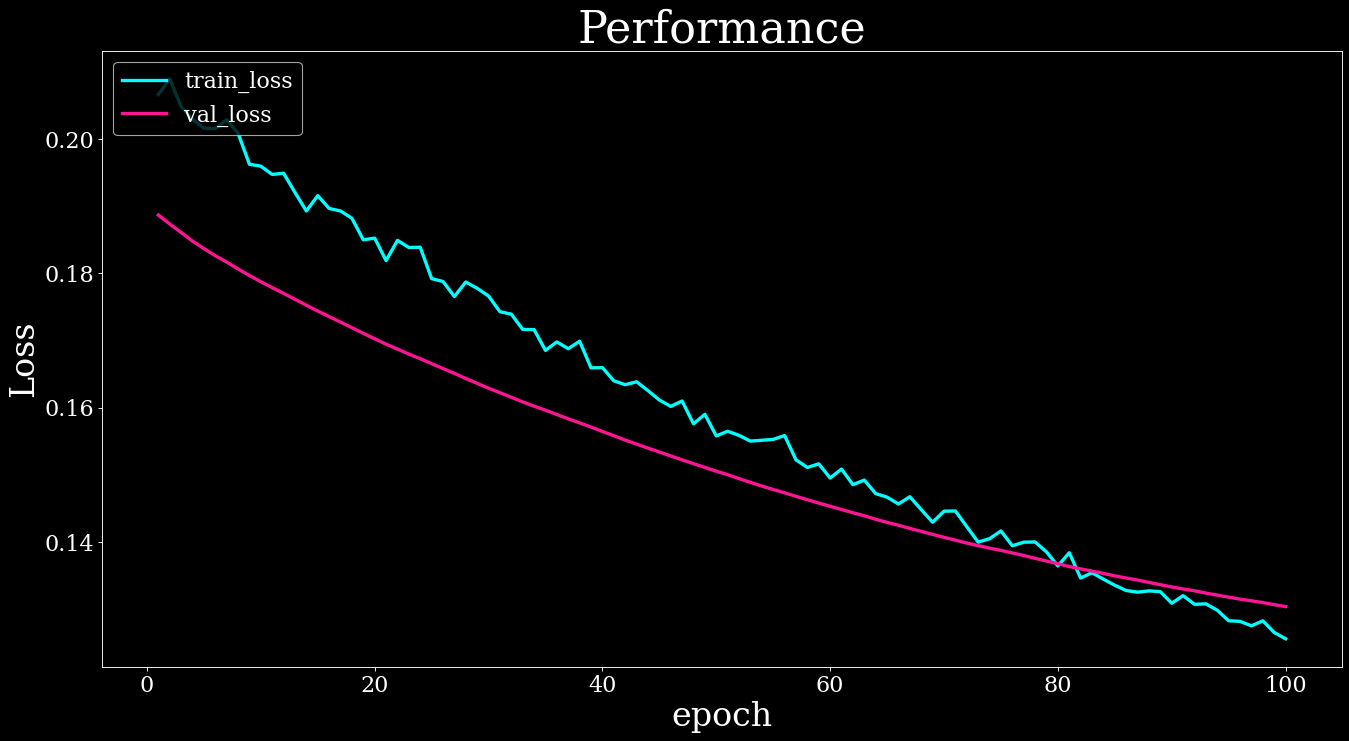

In [26]:

modelGNN = models.GNN(window, 1, 32)

modelGNN, train_losses, val_losses, accuracy_list  = train.train(modelGNN, train_loader, val_loader, 'GNNSimple')

In [27]:
train_loader, val_loader, test_loader = loader.generateLoaders(timeseries, 'fully_connected', window = window, overlap = 0.5)



X_train shape:  (50, 300)
X_val shape:  (50, 100)
X_test shape:  (50, 100)


Using device: cuda
torch.Size([3200, 4])
torch.Size([2, 156800])
torch.Size([3200, 4])
torch.Size([2, 160000])
torch.Size([160000, 1])
torch.Size([3200, 4])
torch.Size([2, 156800])
torch.Size([3200, 4])
torch.Size([2, 160000])
torch.Size([160000, 1])
torch.Size([3200, 4])
torch.Size([2, 156800])
torch.Size([3200, 4])
torch.Size([2, 160000])
torch.Size([160000, 1])
torch.Size([3200, 4])
torch.Size([2, 156800])
torch.Size([3200, 4])
torch.Size([2, 160000])
torch.Size([160000, 1])
torch.Size([1950, 4])
torch.Size([2, 95550])
torch.Size([1950, 4])
torch.Size([2, 97500])
torch.Size([97500, 1])
torch.Size([3200, 4])
torch.Size([2, 156800])
torch.Size([3200, 4])
torch.Size([2, 160000])
torch.Size([160000, 1])
torch.Size([1550, 4])
torch.Size([2, 75950])
torch.Size([1550, 4])
torch.Size([2, 77500])
torch.Size([77500, 1])
torch.Size([3200, 4])
torch.Size([2, 156800])
torch.Size([3200, 4])
torch.Size([2, 160000])
torch.Size([160000, 1])
torch.Size([3200, 4])
torch.Size([2, 156800])
torch.Size([3

<Figure size 640x480 with 0 Axes>

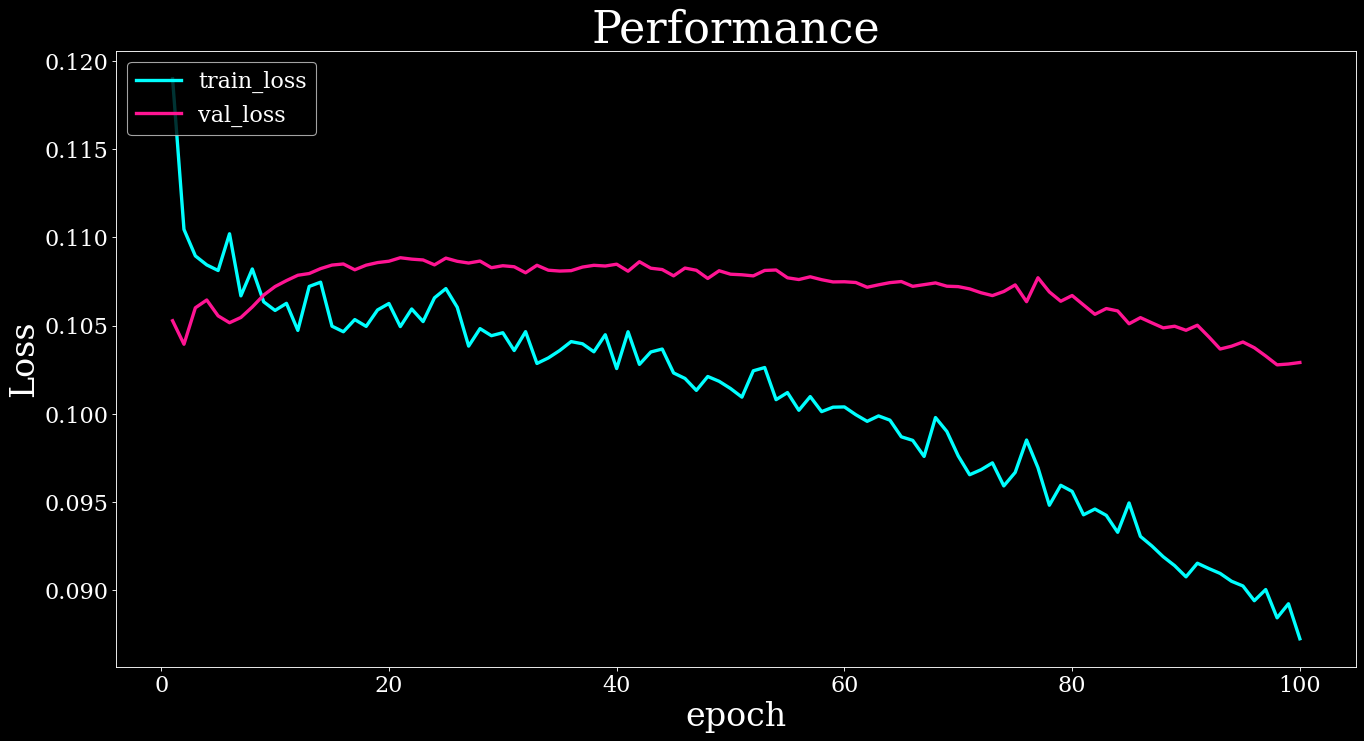

In [8]:
modelGATGCN = models.GATGCN(window, 1, 32)

modelGATGCN, train_losses, val_losses, accuracy_list  = train.train(modelGATGCN, train_loader, val_loader, 'GNNSimple')

In [9]:
modelGATGCN.edgeRep

tensor([[   0,    0,    0,  ..., 1547, 1548, 1549],
        [   1,    2,    3,  ..., 1547, 1548, 1549]], device='cuda:0')

In [14]:
train_loader.dataset[0].edge_index

tensor([[ 0,  0,  0,  ..., 49, 49, 49],
        [ 1,  2,  3,  ..., 46, 47, 48]])

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
testCase = train_loader.dataset[0].to(device)

modelGATGCN(testCase)

torch.Size([50, 4])
torch.Size([2, 2450])
torch.Size([50, 4])
torch.Size([2, 2500])
torch.Size([2500, 1])


tensor([[0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.1013],
        [0.0762],
        [0.0821],
        [0.0619],
        [0.1398],
        [0.0762],
        [0.1658],
        [0.0924],
        [0.0821],
        [0.0821],
        [0.0619],
        [0.0619],
        [0.0619],
        [0.0619],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0679],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924],
        [0.0924]], device='cuda:0', grad_fn=<AddBackward0>)

In [18]:
modelGATGCN.edgeRep

tensor([[ 0,  0,  0,  ..., 47, 48, 49],
        [ 1,  2,  3,  ..., 47, 48, 49]], device='cuda:0')

In [20]:
edges = modelGATGCN.edgeRep.t().tolist()

print(len(edges)    )

# Create a NetworkX graph
G = nx.Graph()
G.add_edges_from(edges)

# Plot the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')

# Show the plot
plt.show()

2500


KeyboardInterrupt: 

In [10]:
print(train_loader.dataset[0].x , train_loader.dataset[0].y)

tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 0.5000, 0.0000, 0.0000],
        [0.0000, 1.0000, 0.5000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.5000],
        [0.0000, 0.0000, 0.0000, 1.0000],
        [1.0000, 0.5000, 0.0000, 1.0000],
        [0.0000, 1.0000, 0.5000, 0.0000],
        [1.0000, 0.5000, 1.0000, 0.5000],
        [0.0000, 1.0000, 0.5000, 1.0000],
        [0.0000, 0.0000, 1.0000, 0.5000],
        [0.0000, 0.0000, 1.0000, 0.5000],
        [0.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0